In [7]:
import random
import numpy as np
from graphviz import Digraph

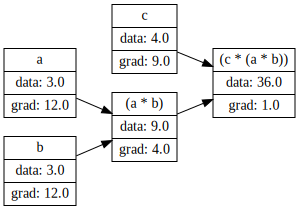

In [12]:
"""
Assumptions:
    1. Graph is acyclic
"""

class Node:
    def __init__(self, value, label = '', children=[], op=''):
        assert label or len(children) is 2
        self.value = value
        self.children = children
        self.label = label if label else f"({children[0].getName()} {op} {children[1].getName()})"
        self.grad = 0.0
        self.op = op

    def getOp(self):
        return self.op
        
    def getValue(self):
        return self.value
    
    def getGrad(self):
        return self.grad
    
    def __str__(self):
        return self.getName()

        
    def __repr__(self):
        return self.getName()
    
    def getLabel(self):
        return f"{self.label} | data: {self.getValue()} | grad: {self.getGrad()}"
    
    def getName(self):
        return self.label
    
    def draw(self):
        dot = Digraph(self.getLabel(), graph_attr={'rankdir': 'LR'})
        nodes = self.top_sort()

        for node in nodes:
            dot.node(name=node.getName(), label=node.getLabel(), shape='record')
            if not len(node.children): continue
            [left, right] = node.children
            dot.edge(left.getName(), node.getName())
            dot.edge(right.getName(), node.getName())
        return dot
    
    def top_sort(self):
        nodes = []
        visited = set()
        self.dfs(nodes, visited)
        return nodes
    
    def dfs(self, nodes=[], visited=set()):
        visited.add(self)
        for child in self.children:
            if child not in visited:
                child.dfs(nodes, visited)
        nodes.append(self)        
    
    def backward(self):
        self.grad = 1.0
        nodes = self.top_sort()
        for node in reversed(nodes):
            if len(node.children) == 2:
                [left, right] = node.children
                left.setGrad(right, node)
                right.setGrad(left, node)


    def setGrad(self, other = None, parent = None):
        if not parent:
            self.grad = 1.0
        if parent.getOp() == '+': # Plus acts like a pass through
            self.grad  = parent.getGrad()
        if parent.getOp() == '*': 
            self.grad = other.getValue() * parent.getGrad()
    
    def __add__(self, other):
        return Node( self.getValue()+other.getValue(), label='', children=[self, other], op='+')
    
    def __mul__(self, other):
        return Node( self.getValue()*other.getValue(), label='', children=[self, other], op='*')


    
# a = Node(2.0, 'a')
# b = Node(-3.0, 'b')
# c = Node(10.0, 'c') 
# d = a*b+c
# d.backward()
# d.draw()

a = Node(3.0, 'a')
b = Node(3.0, 'b')
c = Node(4.0, 'c')
d = a*b
e = c*d
e.backward()
e.draw()

#         de/de = 1
#         de/dd = c = 4
#         de/dc = d = 9
#         dd/da = b
#         dd/db = a
#         de/da = de/dd * dd/da = c * b = 12


In [9]:
def foo():
#     a = 2.0
#     b = -3.0
#     c =10.0
#     d = a*b + c
#     print(d)
#     a = 3.0
#     b = 3.0
#     c = 4.0
#     d = a*b
#     e = c*d
#     """
#         de/de = 1
#         de/dd = c
#         de/dc = d
#         dd/da = b
#         dd/db = a
#         de/da = de/dd * dd/da = c * b = 12
    
#     """
    
    
    a = 3.0
    b = 4.0
    c = a + b
    """
        dc/dc = 1
        dc/da = 1
        dc/db = 1
        dd/da = b
        dd/db = a
        de/da = de/dd * dd/da = c * b = 12
    
    """
    print(c)
foo()

7.0
